# Importar librerias

In [41]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

#Cargar dataset

In [26]:
df = pd.read_csv("iris.csv")

In [27]:
df = df.drop(columns=["Id"])

In [28]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

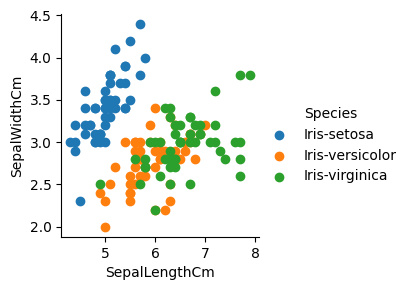

In [15]:
%matplotlib inline
sns.FacetGrid(df,hue='Species')\
.map(plt.scatter,'SepalLengthCm','SepalWidthCm')\
.add_legend()

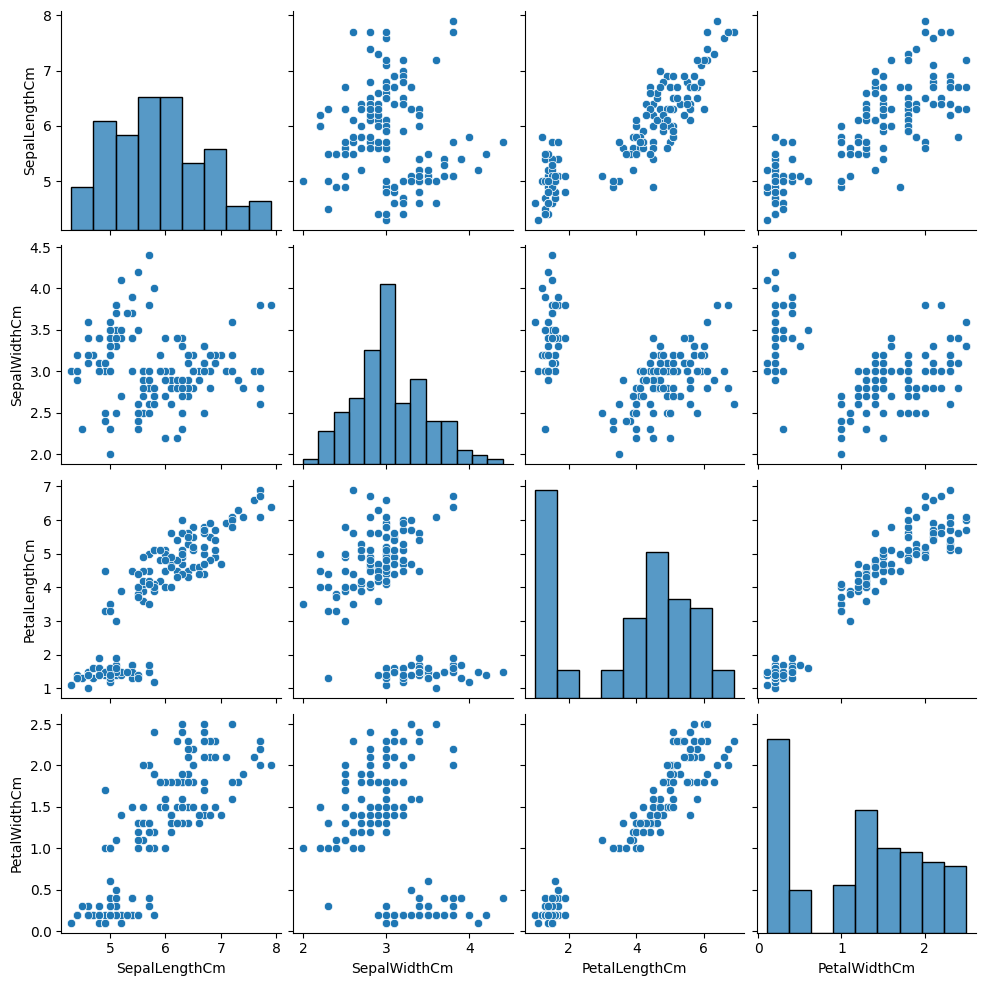

In [16]:
sns.pairplot(data=df,kind='scatter')

In [44]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [45]:
le = LabelEncoder()
Y_enco = le.fit_transform(Y)

In [46]:
Y_enco

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y_enco, test_size=0.33, random_state=42)

In [48]:
reg = LinearRegression().fit(X_train, y_train)

In [49]:
reg.score(X_test, y_test)

0.9386052232801804

In [67]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
    ])
model

In [68]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [69]:
history = model.fit(X_train, y_train, batch_size=50, epochs=100, validation_split=0.1)

Epoch 1/100
2/2 [==============================] - 0s 103ms/step - loss: 1.4496 - accuracy: 0.3222 - val_loss: 1.4109 - val_accuracy: 0.2000
Epoch 2/100
2/2 [==============================] - 0s 23ms/step - loss: 1.2814 - accuracy: 0.3222 - val_loss: 1.2431 - val_accuracy: 0.2000
Epoch 3/100
2/2 [==============================] - 0s 21ms/step - loss: 1.1511 - accuracy: 0.3222 - val_loss: 1.1112 - val_accuracy: 0.3000
Epoch 4/100
2/2 [==============================] - 0s 22ms/step - loss: 1.0515 - accuracy: 0.5111 - val_loss: 1.0146 - val_accuracy: 0.6000
Epoch 5/100
2/2 [==============================] - 0s 19ms/step - loss: 0.9822 - accuracy: 0.6556 - val_loss: 0.9437 - val_accuracy: 0.6000
Epoch 6/100
2/2 [==============================] - 0s 22ms/step - loss: 0.9374 - accuracy: 0.6667 - val_loss: 0.8932 - val_accuracy: 0.9000
Epoch 7/100
2/2 [==============================] - 0s 20ms/step - loss: 0.8964 - accuracy: 0.7556 - val_loss: 0.8551 - val_accuracy: 0.7000
Epoch 8/100
2/2 [==

In [70]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

2/2 [==============================] - 0s 3ms/step - loss: 0.0982 - accuracy: 0.9600
Loss: 0.09823516756296158, Accuracy: 0.9599999785423279


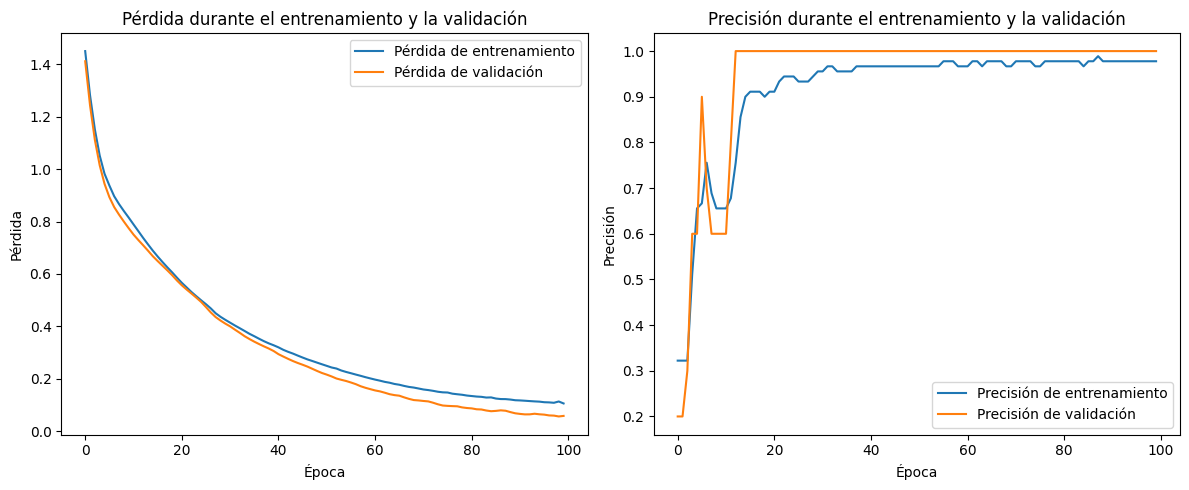

In [71]:
# Graficar el historial de entrenamiento
plt.figure(figsize=(12, 5))

# Gráfica de pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

# Gráfica de precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento y la validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

In [72]:
model.save('iris.h5')

d:\Workspace\Iris\.venv\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
